In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
products = pd.read_csv('products.csv')
order_products = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')

products = products[['product_name', 'product_id']]
order_products = order_products[['product_id', 'order_id', 'reordered']]
orders = orders[['order_id', 'order_hour_of_day', 'order_dow']]

orders.set_index('order_id', inplace=True)
products.set_index('product_id', inplace=True, drop=False)
products.head()

,product_name,product_id
product_id,,
1,Chocolate Sandwich Cookies,1
2,All-Seasons Salt,2
3,Robust Golden Unsweetened Oolong Tea,3
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,4
5,Green Chile Anytime Sauce,5


In [2]:
products_per_order = order_products['order_id'].value_counts()

In [3]:
hours_of_day = []
for hour in range(0,24):
    hours_of_day.append(hour)
hours_of_day

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [4]:
orders_per_hour = []
for hour in hours_of_day:
    is_hours = orders['order_hour_of_day'] == hour
    orders_in_hour = orders[is_hours]
    orders_per_hour.append(orders_in_hour.shape[0])
orders_per_hour

[22758,
 12398,
 7539,
 5474,
 5527,
 9569,
 30529,
 91868,
 178201,
 257812,
 288418,
 284728,
 272841,
 277999,
 283042,
 283639,
 272553,
 228795,
 182912,
 140569,
 104292,
 78109,
 61468,
 40043]

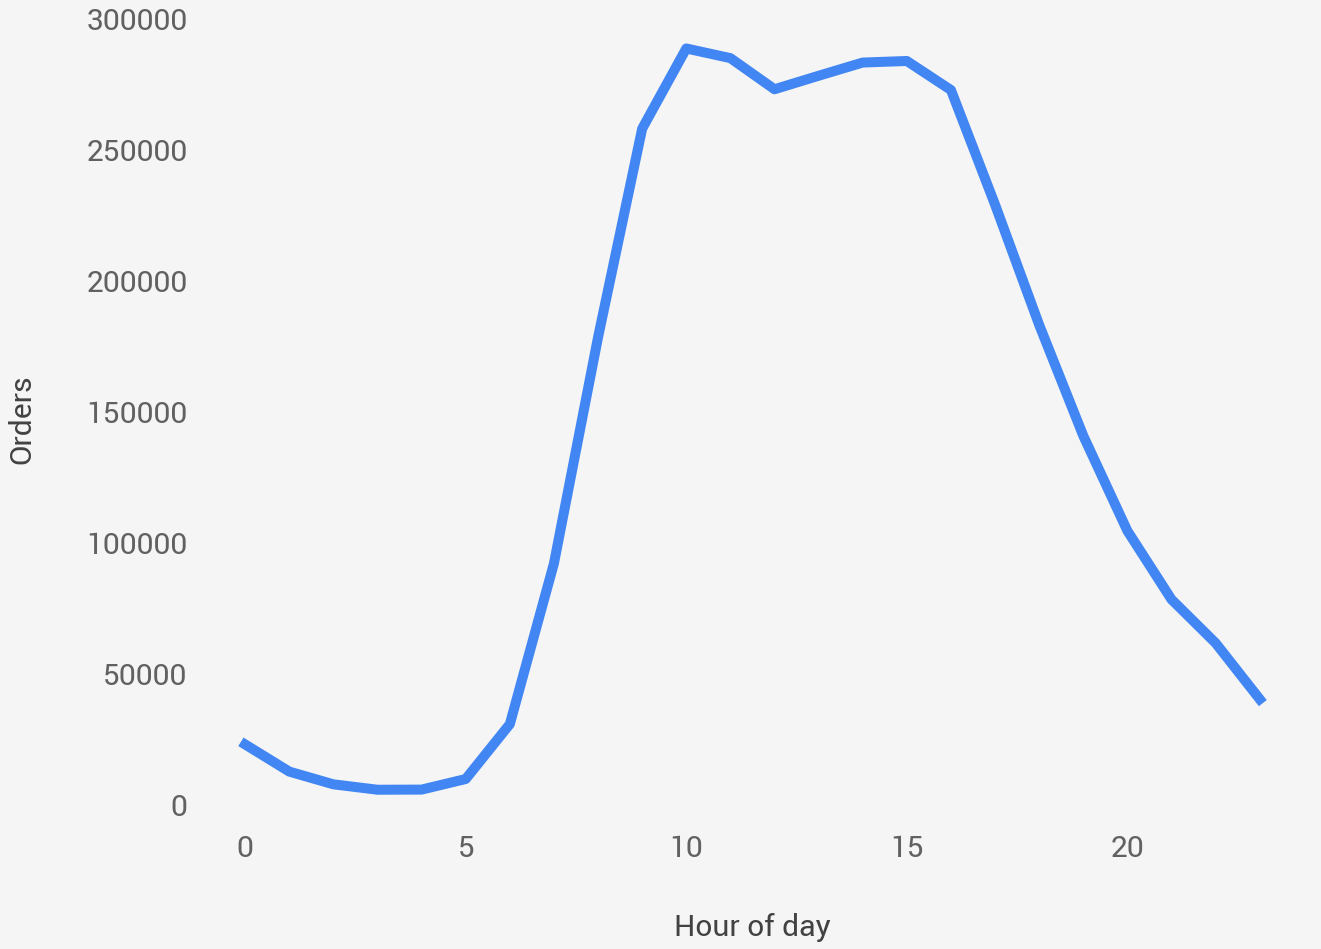

In [79]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,15))
material_blue = (66/255, 134/255, 244/255)
ax.plot(hours_of_day, orders_per_hour, c=material_blue, linewidth=10)
plt.xlabel('Hour of day', fontsize=30, labelpad=50)
plt.ylabel('Orders', fontsize=30, labelpad=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.xaxis.label.set_color('#424242')
ax.yaxis.label.set_color('#424242')
ax.tick_params(colors='#616161')
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('#f5f5f5')


## Orders at different hours of the day

This plot shows the total amount of orders placed per each hour of the day

In [6]:
products_per_hour = []
counter = 0


for hour in hours_of_day:
    is_hours = orders['order_hour_of_day'] == hour
    orders_in_hour = orders[is_hours]
    print(counter)
    counter += 1
    product_count = 0
    for order_id, order in orders_in_hour.iterrows():
        try:
            product_count += products_per_order.loc[order_id]
        except Exception:
            pass
    
    products_per_hour.append(product_count)
    
products_per_hour

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


[218948,
 115786,
 69434,
 51321,
 53283,
 88062,
 290795,
 891937,
 1719973,
 2456713,
 2764426,
 2738582,
 2620847,
 2663292,
 2691548,
 2664533,
 2537458,
 2089465,
 1637923,
 1259401,
 977038,
 796370,
 634734,
 402620]

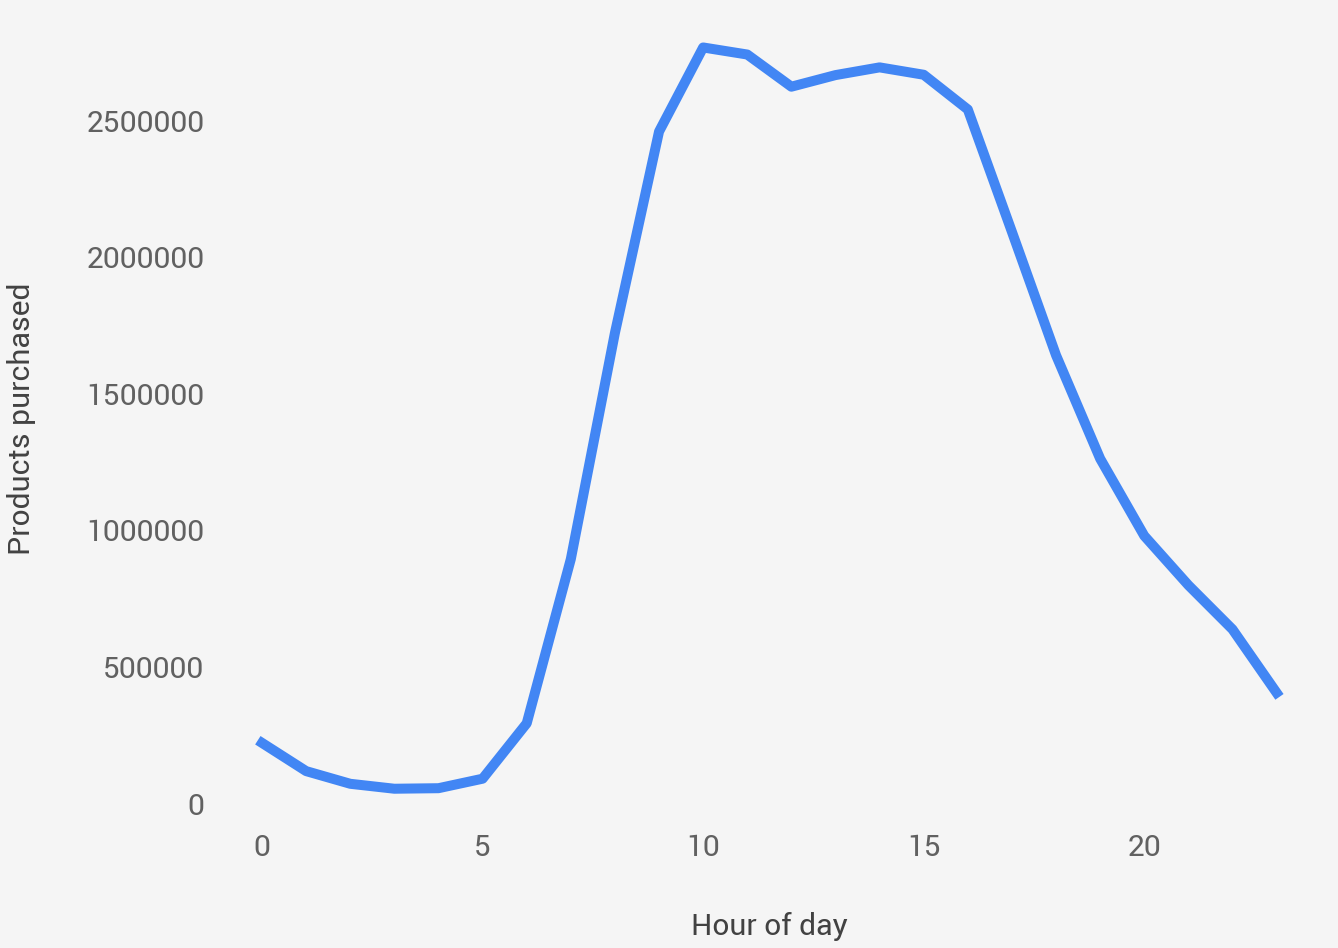

In [80]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,15))
material_blue = (66/255, 134/255, 244/255)
ax.plot(hours_of_day, products_per_hour, c=material_blue, linewidth=10)
plt.xlabel('Hour of day', fontsize=30, labelpad=50)
plt.ylabel('Products purchased', fontsize=30, labelpad=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.xaxis.label.set_color('#424242')
ax.yaxis.label.set_color('#424242')
ax.tick_params(colors='#616161')
ax.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('#f5f5f5')

## Number of products purchased per hour

The number of products purchased per hour mirros the pattern of the orders put in per hour—mostly in the morning and evening.

In [17]:
cookie_id = []
cereal_id = []
ice_cream_id = []
coffee_id = []
apple_id = []
broccoli_id = []
cake_id = []
yogurt_id = []
for index, product in products.iterrows():
    if re.search('[Cc]ookie', product['product_name']) is not None:
        cookie_id.append(products['product_id'].loc[index])
    if re.search('[Cc]ereal', product['product_name']) is not None:
        cereal_id.append(products['product_id'].loc[index])
    if re.search('[Ii]ce [Cc]ream', product['product_name']) is not None:
        ice_cream_id.append(products['product_id'].loc[index])
    if re.search('[Cc]offee', product['product_name']) is not None:
        coffee_id.append(products['product_id'].loc[index])
    if re.search('[Aa]pple', product['product_name']) is not None:
        apple_id.append(products['product_id'].loc[index])
    if re.search('[Bb]roccoli', product['product_name']) is not None:
        broccoli_id.append(products['product_id'].loc[index])
    if re.search('[Cc]ake', product['product_name']) is not None:
        cake_id.append(products['product_id'].loc[index])
    if re.search('[Yy]ogurt|[Yy]oghurt', product['product_name']) is not None:
        yogurt_id.append(products['product_id'].loc[index])


In [9]:
def times_from_id(prod_id_list):
    hours = []
    for prod in prod_id_list:
        is_prod_id = order_products['product_id'] == prod
        order_id = order_products[is_prod_id]
        
        for order in order_id['order_id']:
            hour_of_day = orders['order_hour_of_day'].loc[order]
            hours.append(hour_of_day)
            

    return hours

In [10]:
cookie_hours = times_from_id(cookie_id)
cereal_hours = times_from_id(cereal_id)
coffee_hours = times_from_id(coffee_id)
apple_hours = times_from_id(apple_id)
broccoli_hours = times_from_id(broccoli_id)
ice_cream_hours = times_from_id(ice_cream_id)

In [55]:
cake_hours = times_from_id(cake_id)
yogurt_hours = times_from_id(yogurt_id)

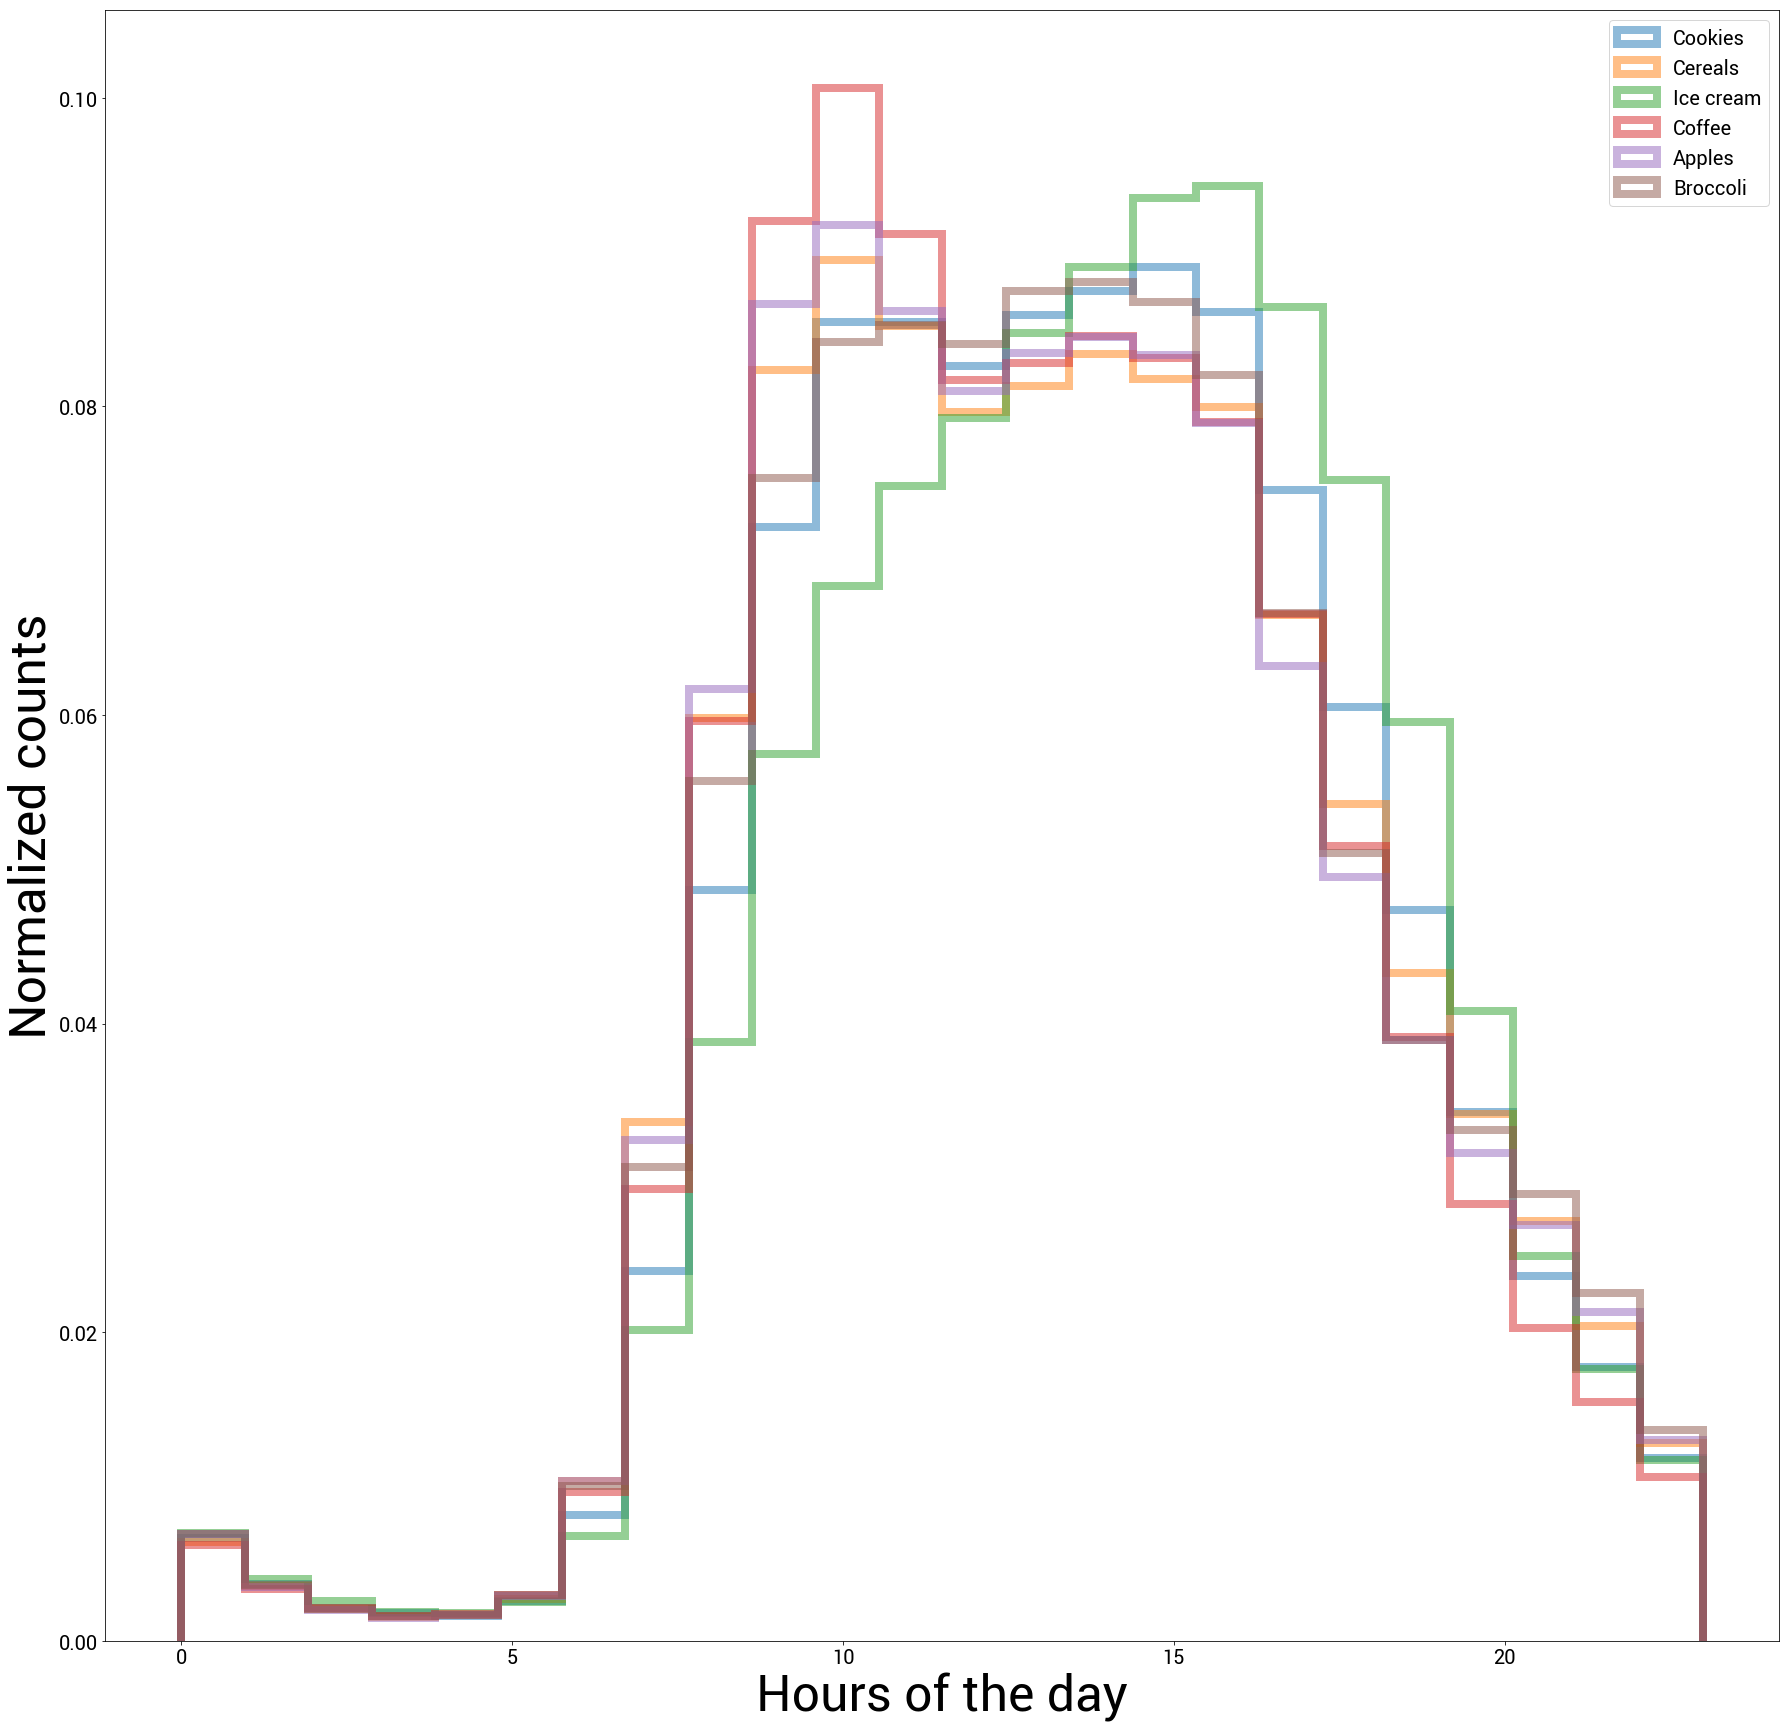

In [92]:
plt.hist(cookie_hours, bins = 24, alpha = 0.5, normed=True, label = 'Cookies', histtype = 'step', linewidth = 8)
plt.hist(cereal_hours, bins = 24, alpha = 0.5, normed=True, label = 'Cereals', histtype = 'step', linewidth = 8)
plt.hist(ice_cream_hours, bins = 24, alpha = 0.5, normed=True, label = 'Ice cream', histtype = 'step', linewidth = 8)
plt.hist(coffee_hours, bins = 24, alpha = 0.5, normed=True, label = 'Coffee', histtype = 'step', linewidth = 8)
plt.hist(apple_hours, bins = 24, alpha = 0.5, normed=True, label = 'Apples', histtype = 'step', linewidth = 8)
plt.hist(broccoli_hours, bins = 24, alpha = 0.5, normed=True, label = 'Broccoli', histtype = 'step', linewidth = 8)

plt.ylabel('Normalized counts', fontsize = 50)
plt.yticks(fontsize = 20)
plt.xlabel('Hours of the day', fontsize = 50)
plt.xticks(fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Products types ordered at different hours of the day

This plot shows different product types purchased during different hours of the day. The histograms are normalized to compare trends. Fristly we can see that people mostly shop early in the morning or later in the afternoon. It can be seen that breakfast foods—such as cereals and coffee—are purchaed in the morning. Similarly apples are purchased more in the morning, but brocolli and cookies slighly favor afternoon hours. Ice cream heavily favors afternoon hours, and is purchased later in the day compared to other evening items.

In [12]:
from itertools import groupby

def percent_purchases_per_hour(hours_list):
    sorted_list = sorted(hours_list)
    hours_frequency = [len(list(group)) for key, group in groupby(sorted_list)]
    percent_of_total = []
    for i, count in enumerate(hours_frequency):
        percent_of_total.append(count / products_per_hour[i])
    return percent_of_total

def norm(input_list):
    normed_list = []
    for i in input_list:
        normed = (i - min(input_list)) / (max(input_list) - min(input_list))
        normed_list.append(normed)
    return normed_list

In [57]:
percent_cookies_per_hour = norm(percent_purchases_per_hour(cookie_hours))
percent_cereal_per_hour = norm(percent_purchases_per_hour(cereal_hours))
percent_coffee_per_hour = norm(percent_purchases_per_hour(coffee_hours))
percent_apple_per_hour = norm(percent_purchases_per_hour(apple_hours))
percent_broccoli_per_hour = norm(percent_purchases_per_hour(broccoli_hours))
percent_ice_cream_per_hour = norm(percent_purchases_per_hour(ice_cream_hours))

In [58]:
percent_cake_per_hour = norm(percent_purchases_per_hour(cake_hours))
percent_yogurt_per_hour = norm(percent_purchases_per_hour(yogurt_hours))

In [18]:
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
# For sans-serif
from matplotlib import rc
rc("font", **{"sans-serif": ["Roboto"]})

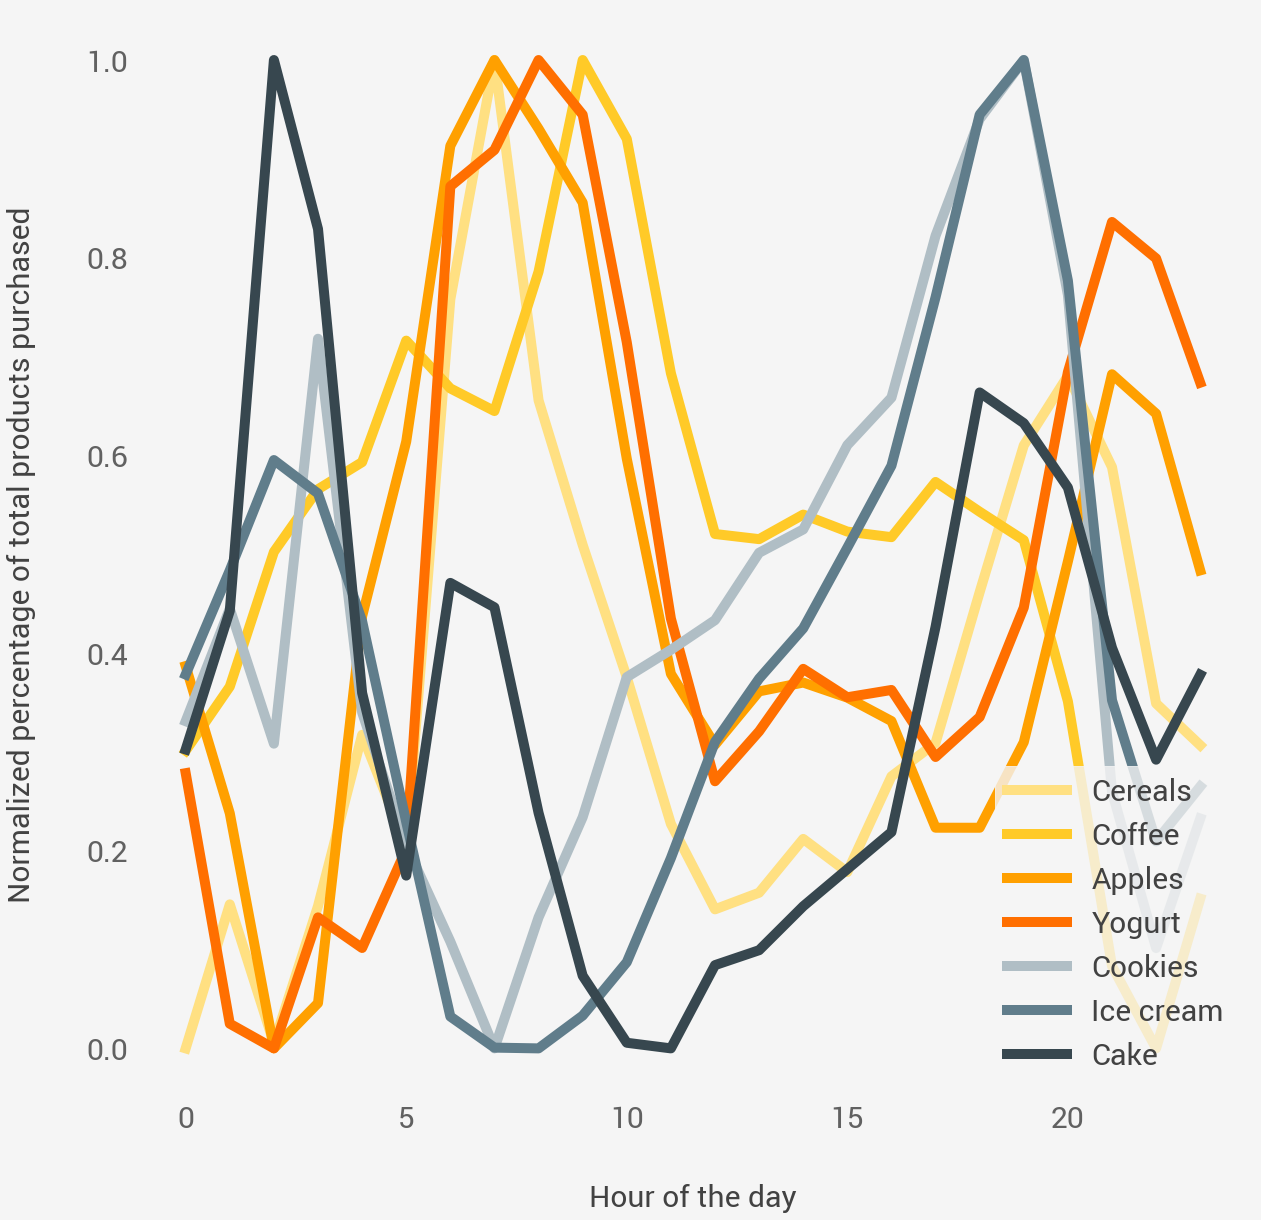

In [90]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel('Hour of the day', fontsize=30, labelpad=50)
plt.ylabel('Normalized percentage of total products purchased', fontsize=30, labelpad=50)
ax.xaxis.label.set_color('#424242')
ax.yaxis.label.set_color('#424242')
ax.tick_params(colors='#616161')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
plt.tick_params(bottom="off", top="off", left="off", right="off")
foods_per_hour = [percent_cereal_per_hour, percent_coffee_per_hour, percent_apple_per_hour, percent_yogurt_per_hour, percent_cookies_per_hour, percent_ice_cream_per_hour, percent_cake_per_hour]
lables = ['Cereals', 'Coffee', 'Apples', 'Yogurt', 'Cookies', 'Ice cream',  'Cake']
colors = ['#ffe082', '#ffca28', '#ffa000', '#ff6f00', '#b0bec5', '#607d8b', '#37474f']
for i, food in enumerate(foods_per_hour):
    plt.plot(hours_of_day, food, linewidth=10, label=lables[i], c=colors[i], alpha=1)

legend = plt.legend(loc='lower right', fontsize=30)

for text in legend.get_texts():
    text.set_color('#424242')
    
ax.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('#f5f5f5')
frame = legend.get_frame()
frame.set_facecolor('#f5f5f5')
frame.set_edgecolor('#f5f5f5')

plt.show()
    


## Percentage of total products purchased at each hour
The trends outlined in the figure above become more apparent when we take the total purchases of each type of product as a percent of the total purchases, then normalize each plot for easy comparison. We can now see shap dependencies for the morning and evening.